**Libraries:**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Data input:**

In [2]:
def get_data(file_path):
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
    return pd.read_csv(file_path)

df = get_data('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


**Preprocess:**

In [3]:
X = df.drop("diabetes", axis=1)  # Replace "target_column_name" with the actual name of your target column.
y = df["diabetes"]

label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

**Split data:**

In [4]:
def split_data(df, test_size=0.15, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df)

**RandomForest:**

In [5]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9702


**Confusion Matrix**

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13716
           1       0.95      0.69      0.80      1284

    accuracy                           0.97     15000
   macro avg       0.96      0.84      0.89     15000
weighted avg       0.97      0.97      0.97     15000



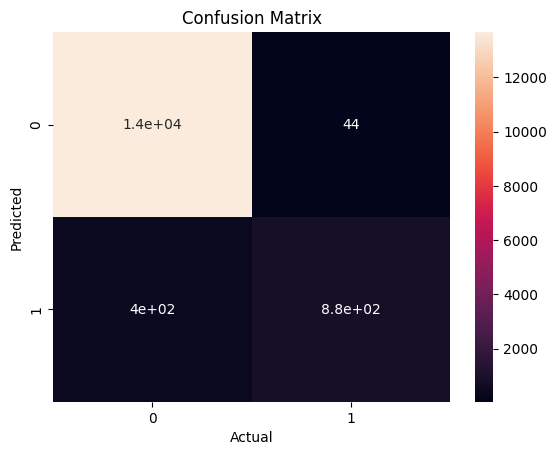

In [6]:
con_rfc=confusion_matrix(y_test,clf.predict(X_test))
plt.plot()
sns.heatmap(con_rfc, annot=True)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

print(classification_report(y_test,clf.predict(X_test)))

**Calculate Mean Squared Error:**

In [7]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE = ', rmse)

RMSE =  0.17262676501632068


**Save trained model:**

In [8]:
import pickle
pickle.dump(clf, open('model.sav', 'wb'))
print('...model saved...')

...model saved...
